In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TCS_data=pd.read_csv(r"R:\DATA SCIENCE\Dharmarajan\TCS Stock Price Prediction\TCS1.CSV")
TCS_data=pd.DataFrame(TCS_data)
TCS_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [3]:
TCS_data.duplicated().value_counts()

False    4494
Name: count, dtype: int64

In [4]:
TCS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [5]:
TCS_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [6]:
TCS_data.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [7]:
TCS_data=TCS_data.dropna()

In [8]:
TCS_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

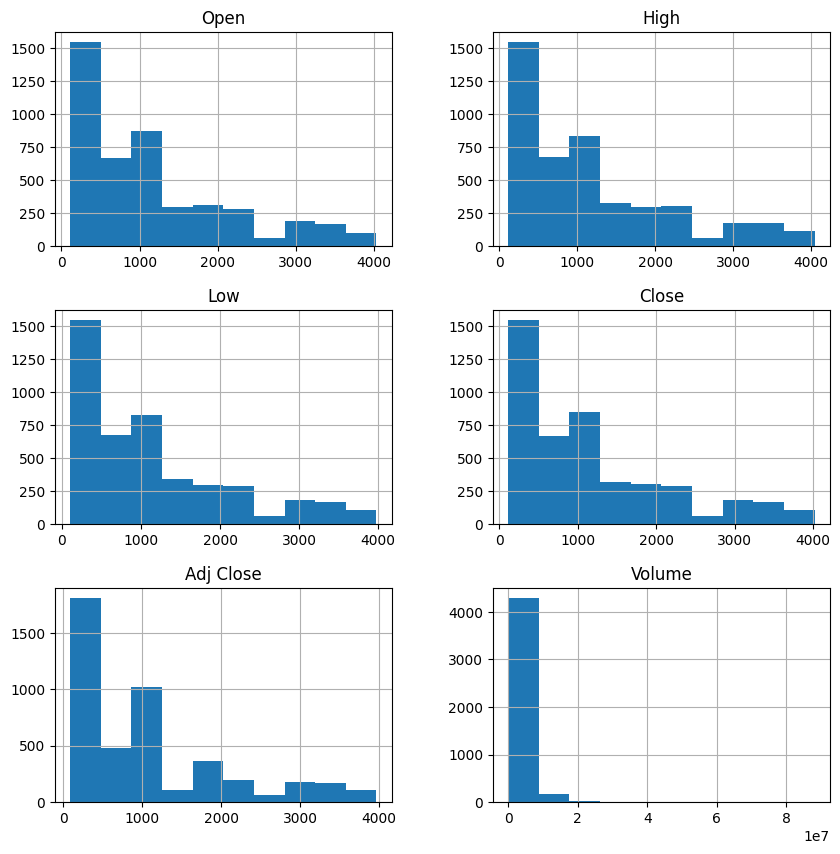

In [9]:
TCS_data.hist(figsize=(10,10),bins=10)
plt.show()

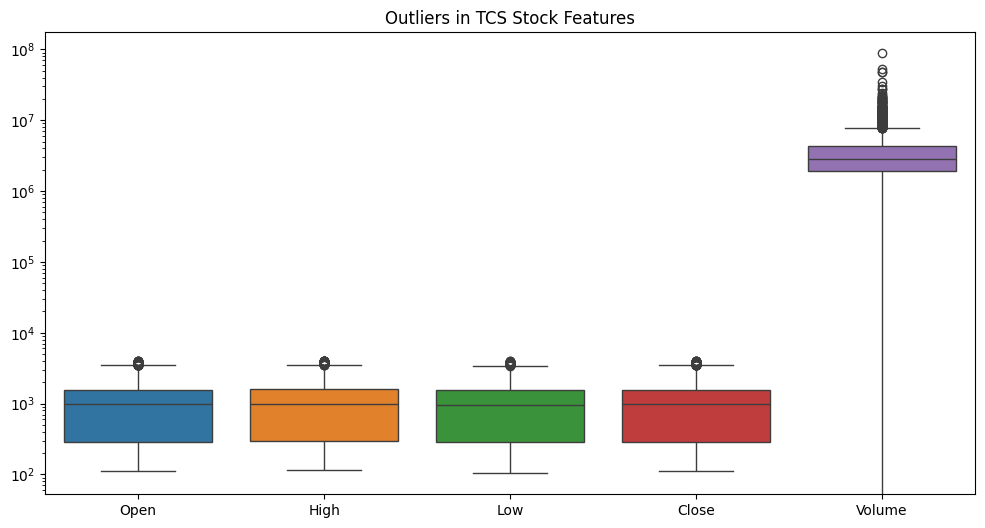

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=TCS_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.yscale('log')  # Log scale for Volume to handle skewness
plt.title('Outliers in TCS Stock Features')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X=TCS_data.drop(columns=(['Date','Close']),axis=1)
y=TCS_data['Close']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#shape of the train and test

print("X_train:",X_train.shape,"X_test:",X_test.shape,"y_train:",y_train.shape,"y_test:",y_test.shape)

X_train: (3588, 5) X_test: (898, 5) y_train: (3588,) y_test: (898,)


In [12]:
X

,Open,High,Low,Adj Close,Volume
0,122.800003,122.800003,119.820000,88.088272,30646000.0
1,121.237503,123.750000,120.625000,90.293549,24465208.0
2,123.312500,123.750000,122.000000,90.416122,21194656.0
3,123.750000,124.375000,122.949997,90.397820,19935544.0
4,123.737503,125.574997,123.250000,90.924896,21356352.0
...,...,...,...,...,...
4489,3150.000000,3155.350098,3128.550049,3144.699951,1793722.0
4490,3159.000000,3159.000000,3112.000000,3121.850098,1194289.0
4491,3105.000000,3160.000000,3105.000000,3157.300049,1587601.0
4492,3157.800049,3160.399902,3127.000000,3137.399902,1021913.0


In [13]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
# ML imports
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [17]:
from sklearn.pipeline import Pipeline
ran_pipeline=Pipeline(steps=[
    
    ('lin',LinearRegression())
])

In [18]:
ran=LinearRegression() 
ran.fit(X_train,y_train)

LinearRegression()

In [19]:
X_test['Close']=y_test

In [20]:
X_test

,Open,High,Low,Adj Close,Volume,Close
158,174.625000,175.000000,170.012497,125.440979,2822992.0,170.449997
3981,2489.000000,2505.000000,2460.000000,2421.491943,3917166.0,2492.300049
1019,178.274994,179.962494,167.762497,131.949356,15122632.0,172.100006
1118,120.250000,122.650002,119.250000,93.549805,8808288.0,120.550003
732,286.250000,286.250000,277.750000,210.461609,4382172.0,278.787506
...,...,...,...,...,...,...
3533,2006.000000,2018.000000,1985.000000,1860.223022,2501539.0,2006.750000
3857,1825.900024,1834.750000,1702.000000,1651.632202,4941878.0,1708.750000
4218,3882.100098,3980.000000,3866.000000,3893.311035,2461369.0,3954.550049
3740,1995.000000,2032.750000,1968.000000,1897.061768,3510704.0,2021.000000


In [23]:
ran.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Close


In [22]:
ran.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Close
